## QUESTIONS 
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

Q2. Load the Wine Quality dataset and explore its dimensions. 

Q3. Check for null values, identify categorical variables, and encode them.

Q4. Separate the features and target variables from the dataset.

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

Q6. Scale the dataset using an appropriate scaling technique.

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical 
variables.

Q8. Create a Sequential model in Keras and add the previously designed layers to it.

Q9. Print the summary of the model architecture.

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

Q11. Compile the model with the specified loss function, optimizer, and metrics.

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

Q13. Obtain the model's parameters (weights and biases).

Q14. Store the model's training history as a Pandas DataFrame.

Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 52.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 78.4 MB/s eta 0:00:

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

2023-08-18 04:49:48.505054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 04:49:48.577502: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 04:49:48.578712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 04:49:49.686316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
print(tf.__version__)
import keras
print(keras.__version__)

2.13.0
2.13.1


In [5]:
##loading data
wine_data = pd.read_csv("wine.csv",sep=',')

In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [7]:
## checking dimensions
print("Number of rows:", wine_data.shape[0])
print("Number of columns:", wine_data.shape[1])

Number of rows: 1599
Number of columns: 12


In [8]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [9]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [10]:
# Identify categorical variables
categorical_variables = wine_data.select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['quality'], dtype='object')


In [11]:
## null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
print(wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


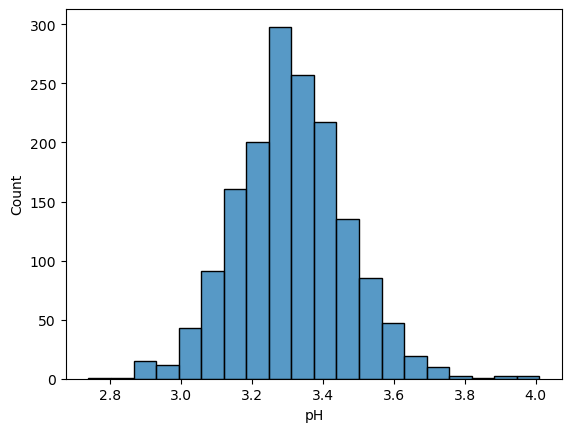

In [13]:
sb.histplot(data=wine_data, x='pH', bins=20)
plt.show()


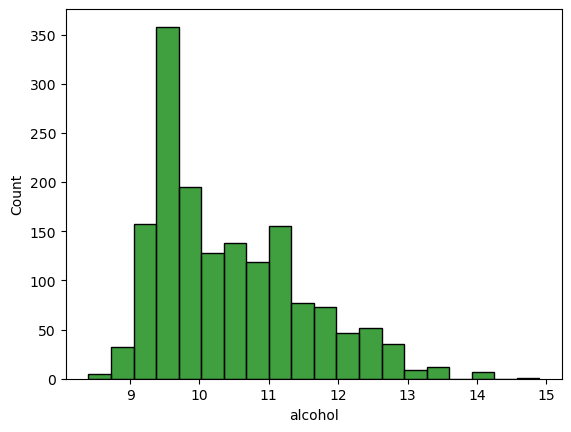

In [14]:
sb.histplot(data=wine_data, x='alcohol', bins=20,color='green')
plt.show()


/tmp/ipykernel_84/47677326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wine_data.corr()


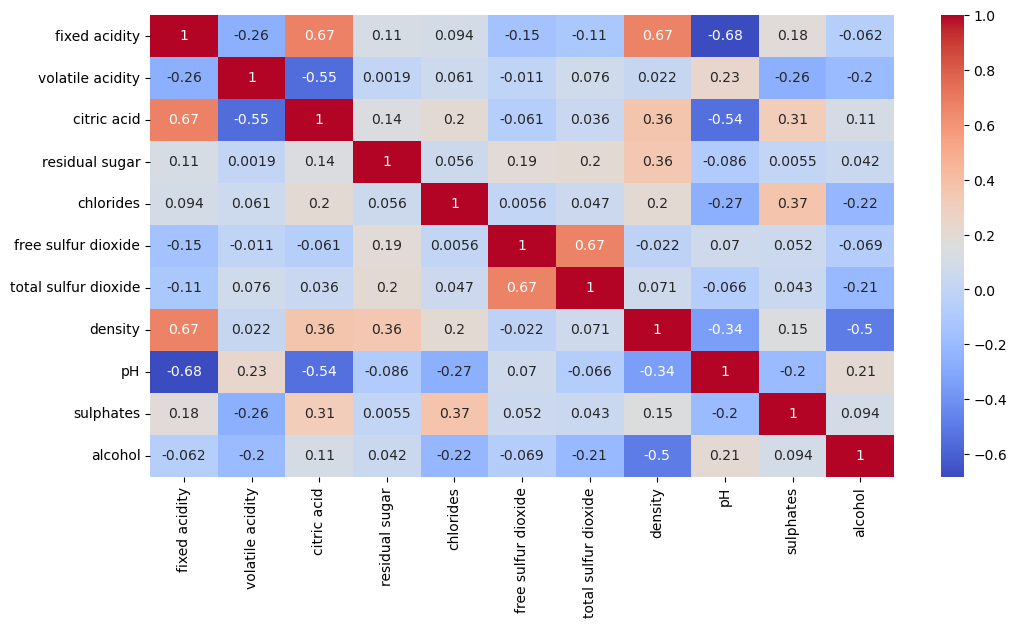

In [15]:
correlation_matrix = wine_data.corr()
plt.subplots(figsize=(12, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [16]:
## seprating features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality'] 

In [17]:
y.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split

##split data into train, test and validation 
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp_encoded, test_size=0.5, random_state=42)


In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_temp.shape)

(1119, 11)
(240, 11)
(480, 11)


In [22]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_temp_encoded.shape)

(1119,)
(240,)
(480,)


In [23]:
## scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_temp)

print(X_train_scaled.mean())
print(X_train_scaled.std())

-3.698181847954409e-15
1.0


In [24]:
from tensorflow import keras
from tensorflow.keras import layers

## define the model with input layer, hidden layers, dropout, and output layer and creating sequential model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  

    layers.Dense(128, activation='relu'),  
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])


In [25]:
## print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [26]:
## compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
## fit the model
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=50,  
    batch_size=32
)

Epoch 1/50
35/35 [==============================] - 2s 11ms/step - loss: 0.9617 - accuracy: 0.4924 - val_loss: 0.7032 - val_accuracy: 0.4625
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.7413 - accuracy: 0.5058 - val_loss: 0.6764 - val_accuracy: 0.6542
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.5299 - val_loss: 0.6949 - val_accuracy: 0.5125
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5719 - val_loss: 0.7028 - val_accuracy: 0.5417
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5880 - val_loss: 0.6909 - val_accuracy: 0.6167
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5827 - val_loss: 0.6561 - val_accuracy: 0.6333
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.6202 - val_loss: 0.6555 - val_accuracy: 0.6292
Epoch 8/50
35/35 [=

In [28]:
## getting weights and biases
layers_list = model.layers
for layer in layers_list:
    weights = layer.get_weights()
    if len(weights) > 0:
        print(f"Layer {layer.name}:")
        print("Weights:")
        print(weights[0])
        print("Biases:")
        print(weights[1])
        print("\n")

Layer dense:
Weights:
[[-8.83403420e-03  2.10403800e-01 -8.44031945e-02 -5.56132570e-02
  -2.45198905e-02  5.46562597e-02 -1.30315974e-01  6.98795021e-02
   2.41016537e-01 -2.00079918e-01 -3.34470384e-02 -2.44100988e-02
   1.73538744e-01  7.32905567e-02 -8.80487338e-02  6.49251267e-02
   2.23151818e-01  1.67876750e-01  5.25655299e-02 -1.64348990e-01
   8.99150968e-03 -4.66949530e-02 -3.59287381e-01 -2.14927852e-01
  -5.70111861e-03  9.30918083e-02 -1.24924898e-01  1.05512455e-01
  -1.49402767e-01  5.40157128e-03 -2.11812541e-01  8.95310491e-02
  -1.66311190e-01 -2.30666935e-01 -6.49220049e-02 -1.63296193e-01
   1.15170054e-01  5.59097063e-03  2.67221034e-01 -2.82036841e-01
  -1.95169598e-01  1.92167923e-01  1.02783337e-01  9.92991850e-02
   1.95606634e-01 -9.17770714e-02 -2.22443998e-01  1.09799683e-01
   3.58651648e-03 -4.96501476e-02 -1.07694380e-01  2.26560637e-01
   2.01915368e-01  1.08306825e-01 -1.07053638e-01 -1.17192745e-01
   7.05302358e-02  1.64116055e-01 -2.47405767e-01  3.9

In [29]:
## Convert the history dictionary to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

## Print the first few rows of the DataFrame
history_df.to_csv('training_history2.csv', index=False)

In [30]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.961715,0.492404,0.703177,0.462500
1,0.741316,0.505809,0.676359,0.654167
2,0.722891,0.529937,0.694868,0.512500
3,0.686754,0.571939,0.702779,0.541667
4,0.691753,0.588025,0.690911,0.616667


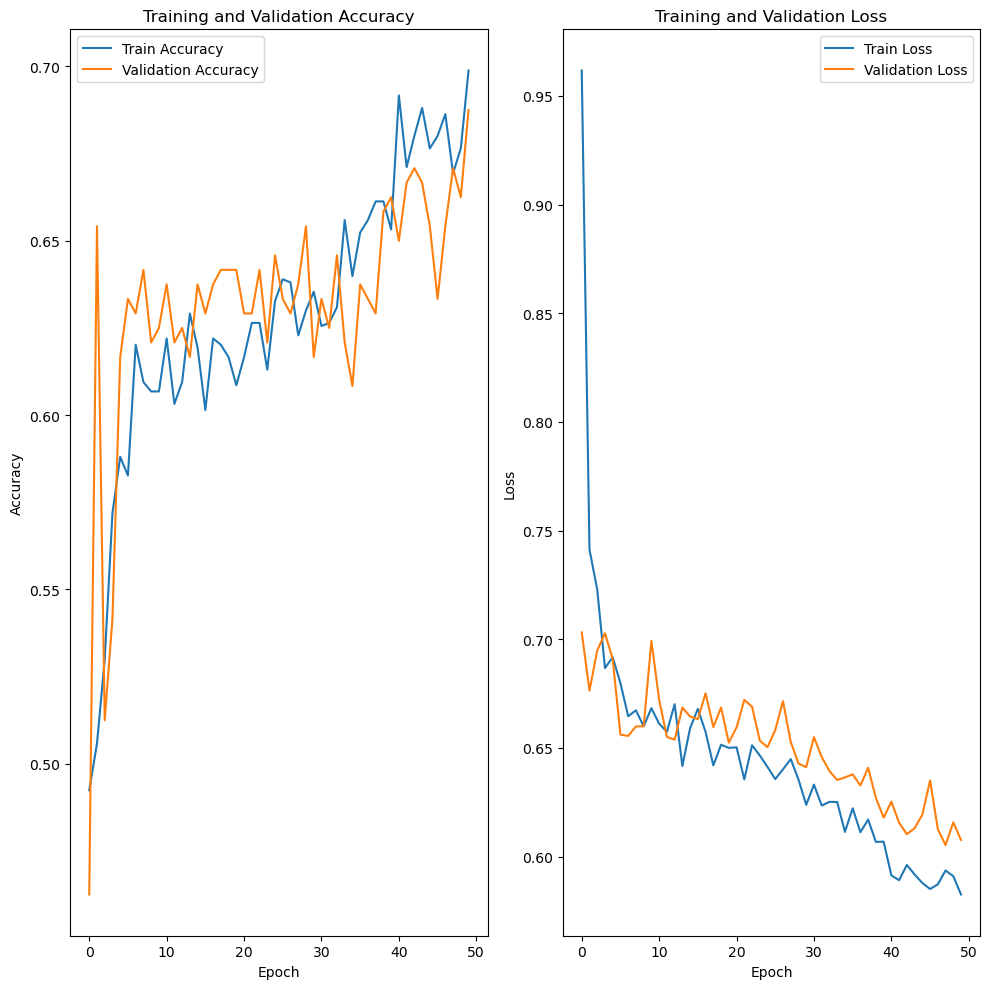

In [31]:
import matplotlib.pyplot as plt

## plot training and validation metrics
plt.figure(figsize=(10, 10))

## plot training accuracy and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## plot training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_temp_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


15/15 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.6729
Test Loss: 0.617995023727417
Test Accuracy: 0.6729166507720947
